In [158]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Data system users

In [159]:
#datasys_users = execute_to_df("2_data_system_users_info.sparql")
#datasys_users

# this takes too long too execute! 
# graphDB environment currently allow for quicker execution 
# saved those results into csv files (see 'data/query_results/')

In [160]:
file_path = "/data/query_results/2_data_systems_users_info_sparql.csv"
datasys_users = pd.read_csv(file_path)
datasys_users

,datasyst_user,affiliation_id,name,qh,group,flemish,country_id,country_code2,country_code3
0,http://lifewatch-user-analysis-2023/user/fa74e...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
1,http://lifewatch-user-analysis-2023/user/bce98...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
2,http://lifewatch-user-analysis-2023/user/509df...,https://marineinfo.org/id/institute/8576,RMCA Royal Museum for Central Africa,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Museum,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
3,http://lifewatch-user-analysis-2023/user/a5eae...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
4,http://lifewatch-user-analysis-2023/user/7322d...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
...,...,...,...,...,...,...,...,...,...
2938,http://lifewatch-user-analysis-2023/user/af3f4...,https://ror.org/03s7gtk40,Leipzig University,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,DE,DEU
2939,http://lifewatch-user-analysis-2023/user/1d248...,https://marineinfo.org/id/institute/9076,University of Salento,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,IT,ITA
2940,http://lifewatch-user-analysis-2023/user/1ef0b...,http://lifewatch-user-analysis-2023/affiliatio...,University of Essex - School of Computer Scien...,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,GB,GBR
2941,http://lifewatch-user-analysis-2023/user/2b989...,https://marineinfo.org/id/institute/9804,Massey University,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,NZ,NZL


In [161]:
# this time with the users of marine regions included 
# (note: given the high number of users, many affiliations of these users are yet to be identified, resulting is many missing names)
file_path = "/data/query_results/2_data_systems_users_info_sparql_MarineRegions.csv"
datasys_users = pd.read_csv(file_path)
datasys_users

,datasyst_user,affiliation_id,name,qh,group,flemish,country_id,country_code2,country_code3
0,http://lifewatch-user-analysis-2023/user/fa74e...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
1,http://lifewatch-user-analysis-2023/user/bce98...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
2,http://lifewatch-user-analysis-2023/user/509df...,https://marineinfo.org/id/institute/8576,RMCA Royal Museum for Central Africa,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Museum,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
3,http://lifewatch-user-analysis-2023/user/a5eae...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
4,http://lifewatch-user-analysis-2023/user/7322d...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,True,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL
...,...,...,...,...,...,...,...,...,...
148311,http://lifewatch-user-analysis-2023/user/af3f4...,https://ror.org/03s7gtk40,Leipzig University,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,DE,DEU
148312,http://lifewatch-user-analysis-2023/user/1d248...,https://marineinfo.org/id/institute/9076,University of Salento,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,IT,ITA
148313,http://lifewatch-user-analysis-2023/user/1ef0b...,http://lifewatch-user-analysis-2023/affiliatio...,University of Essex - School of Computer Scien...,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,GB,GBR
148314,http://lifewatch-user-analysis-2023/user/2b989...,https://marineinfo.org/id/institute/9804,Massey University,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,NZ,NZL


In [162]:
datasys_users.groupby("datasyst_user").nunique()
print(f"Total of data system users: {datasys_users.groupby('datasyst_user').nunique().shape[0]}.")

datasys_users.groupby("affiliation_id").nunique().sum()
print(f"Total of unique affiliation identifiers: {datasys_users.groupby('affiliation_id').nunique().shape[0]}.")

datasys_users.groupby("name").nunique()
print(f"Total of unique affiliation names: {datasys_users.groupby('name').nunique().shape[0]}.")
# (sidenote: the larger number here indicates that some affiliation identifiers have multiple names!
#    -> highlights the importance of using unique identifiers
#    -> creates a to-do for us: check this & remove duplicate names)

Total of data system users: 143422.
Total of unique affiliation identifiers: 936.
Total of unique affiliation names: 969.


### Quadruple Helix distribution of data system users

In [163]:
datasys_users_qh = datasys_users.groupby(['qh']).nunique()
datasys_users_qh = datasys_users_qh.rename(index={
    'http://lifewatch.org/ns/Civil_society': 'Civil society', 
    'http://lifewatch.org/ns/Industry': 'Industry', 
    'http://lifewatch.org/ns/Policy': 'Policy',
    'http://lifewatch.org/ns/Science': 'Science'})

datasys_users_qh[['datasyst_user', 'affiliation_id']].rename(columns={'datasyst_user':'User count', 'affiliation_id':'User affiliation count'}).transpose()

# note 1: indication of re-use of uuid across datasystem user files --> todo:solve
# as a consequence, these numbers are indicative

# note 2: Users who's affiliation is yet to be identified are classified within the 'personal interest' group and are listed under civil society

qh,Civil society,Industry,Policy,Science
User count,114524,4015,4804,20113
User affiliation count,59,174,96,608


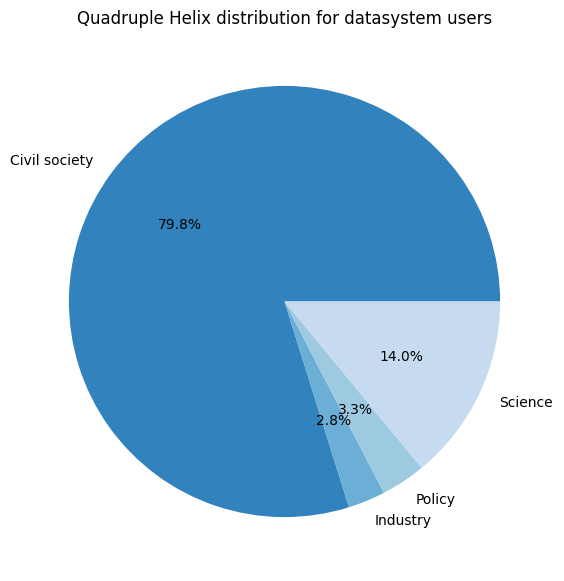

In [164]:
# Graph ~ users
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(4))
pie_qh_user = datasys_users_qh.plot(kind='pie', y='datasyst_user', figsize=(7, 7), autopct='%1.1f%%', colors=colors, legend=False)

pie_qh_user.set_title('Quadruple Helix distribution for datasystem users')
pie_qh_user.set_ylabel('')
plt.show()

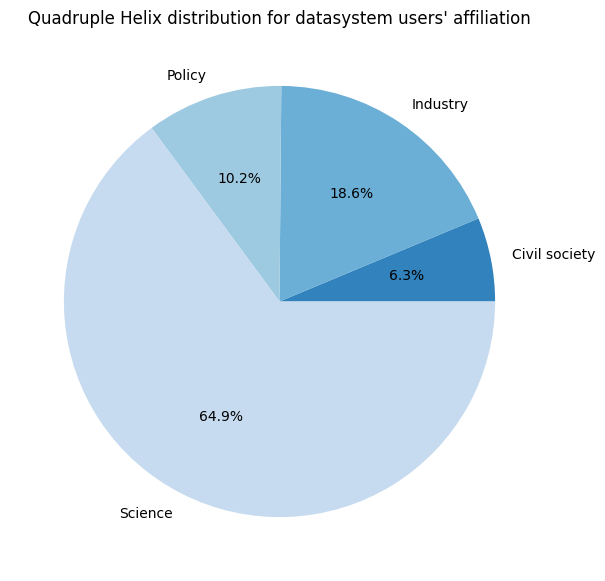

In [165]:
# Graph ~ user' affiliation
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(4))
pie_qh_user = datasys_users_qh.plot(kind='pie', y='affiliation_id', figsize=(7, 7), autopct='%1.1f%%', colors=colors, legend=False)

pie_qh_user.set_title("Quadruple Helix distribution for datasystem users' affiliation")
pie_qh_user.set_ylabel('')
plt.show()

### Number of data system users per country

In [166]:
# there are 2 species cases for country:
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU> = EU affiliations 
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA> = personal affiliations 

datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_code2'] = 'EU'
datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_code3'] = 'EUR'

datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_code2'] = 'personal'
datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_code3'] = 'personal'

In [167]:
# wrangle dataframe into right format 
count_info = datasys_users.groupby('country_code2').count()
count_info['non-flemish'] = 0
count_info['other'] = count_info['datasyst_user']

count_info.loc['BE', 'non-flemish'] = count_info.loc['BE', 'datasyst_user'] - count_info.loc['BE', 'flemish']
count_info.loc['BE', 'other'] = 0
count_info_reduced = count_info[['flemish', 'non-flemish', 'other']]
count_info_reduced

# 'personal' corresponds to all users whose affliiation was not yet identified 
# this number is high due to the inclusion of marine regions users
# because of the skew this creates, we will leave it out of the data

,flemish,non-flemish,other
country_code2,,,
AL,0,0,1
AR,0,0,18
AT,0,0,66
AU,0,0,1734
BE,2112,622,0
...,...,...,...
US,0,0,8354
UY,0,0,2
VN,0,0,2


In [168]:
# sorting values & leaving out 'personal'
count_info.sort_values(by='datasyst_user', inplace=True)
count_info.drop('personal', inplace=True)

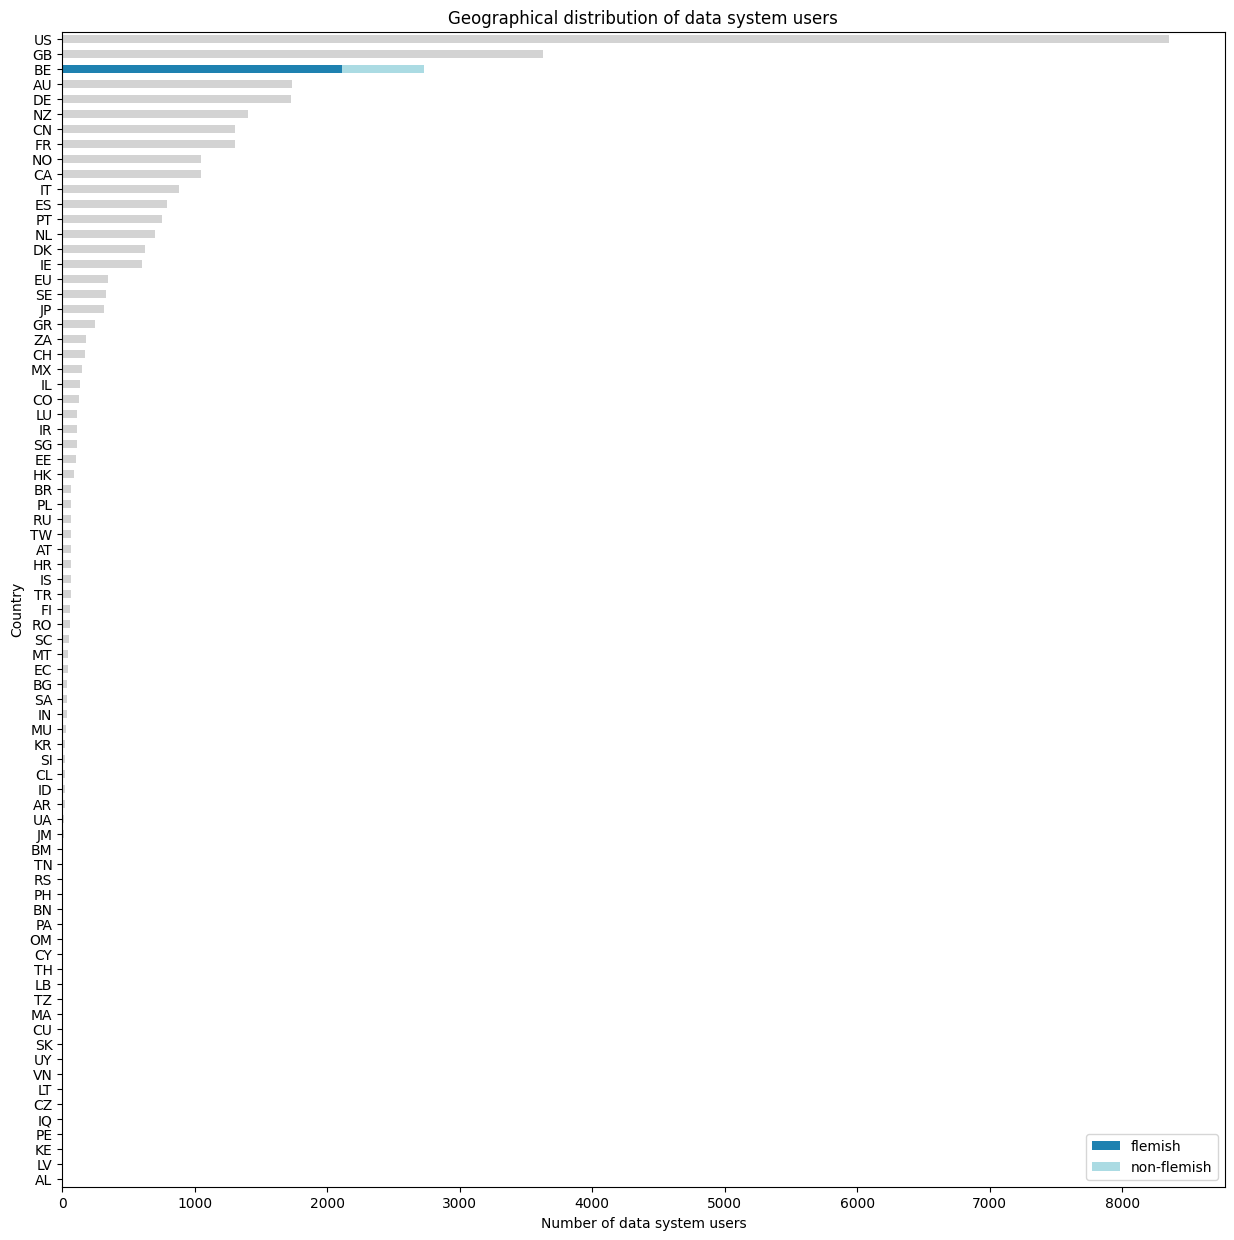

In [169]:
# Horizontal bar chart of number of data system users per country, with a distinction between flemish and non-flemish for Belgium affiliations
# side note: for those data system users for which a affiliation name could be linked!
colors = ['#1e81b0', '#abdbe3', 'lightgrey']
barh_top20 = count_info.plot(kind='barh', y=['flemish','non-flemish', 'other'], stacked=True, color=colors, figsize=(15, 15))

barh_top20.set_title('Geographical distribution of data system users')
barh_top20.set_xlabel('Number of data system users')
barh_top20.set_ylabel('Country')
barh_top20.legend(['flemish', 'non-flemish'], loc="lower right")
plt.show()

#personal corresponds to all users for which no 

In [170]:
count_info.sort_values(by='datasyst_user', ascending=False, inplace=True)
count_info_top20 = count_info.head(20)
count_info_top20

,datasyst_user,affiliation_id,name,qh,group,flemish,country_id,country_code3,non-flemish,other
country_code2,,,,,,,,,,
US,8354,8354,8354,8354,8354,0,8354,8354,0,8354
GB,3628,3628,3628,3628,3628,0,3628,3628,0,3628
BE,2734,2734,2734,2734,2734,2112,2734,2734,622,0
AU,1734,1734,1734,1734,1734,0,1734,1734,0,1734
DE,1725,1725,1725,1725,1725,0,1725,1725,0,1725
NZ,1404,1404,1404,1404,1404,0,1404,1404,0,1404
CN,1304,1304,1304,1304,1304,0,1304,1304,0,1304
FR,1302,1302,1302,1302,1302,0,1302,1302,0,1302
NO,1051,1051,1051,1051,1051,0,1051,1051,0,1051


/tmp/ipykernel_559/3239562402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_info_top20.sort_values(by='datasyst_user',inplace=True)


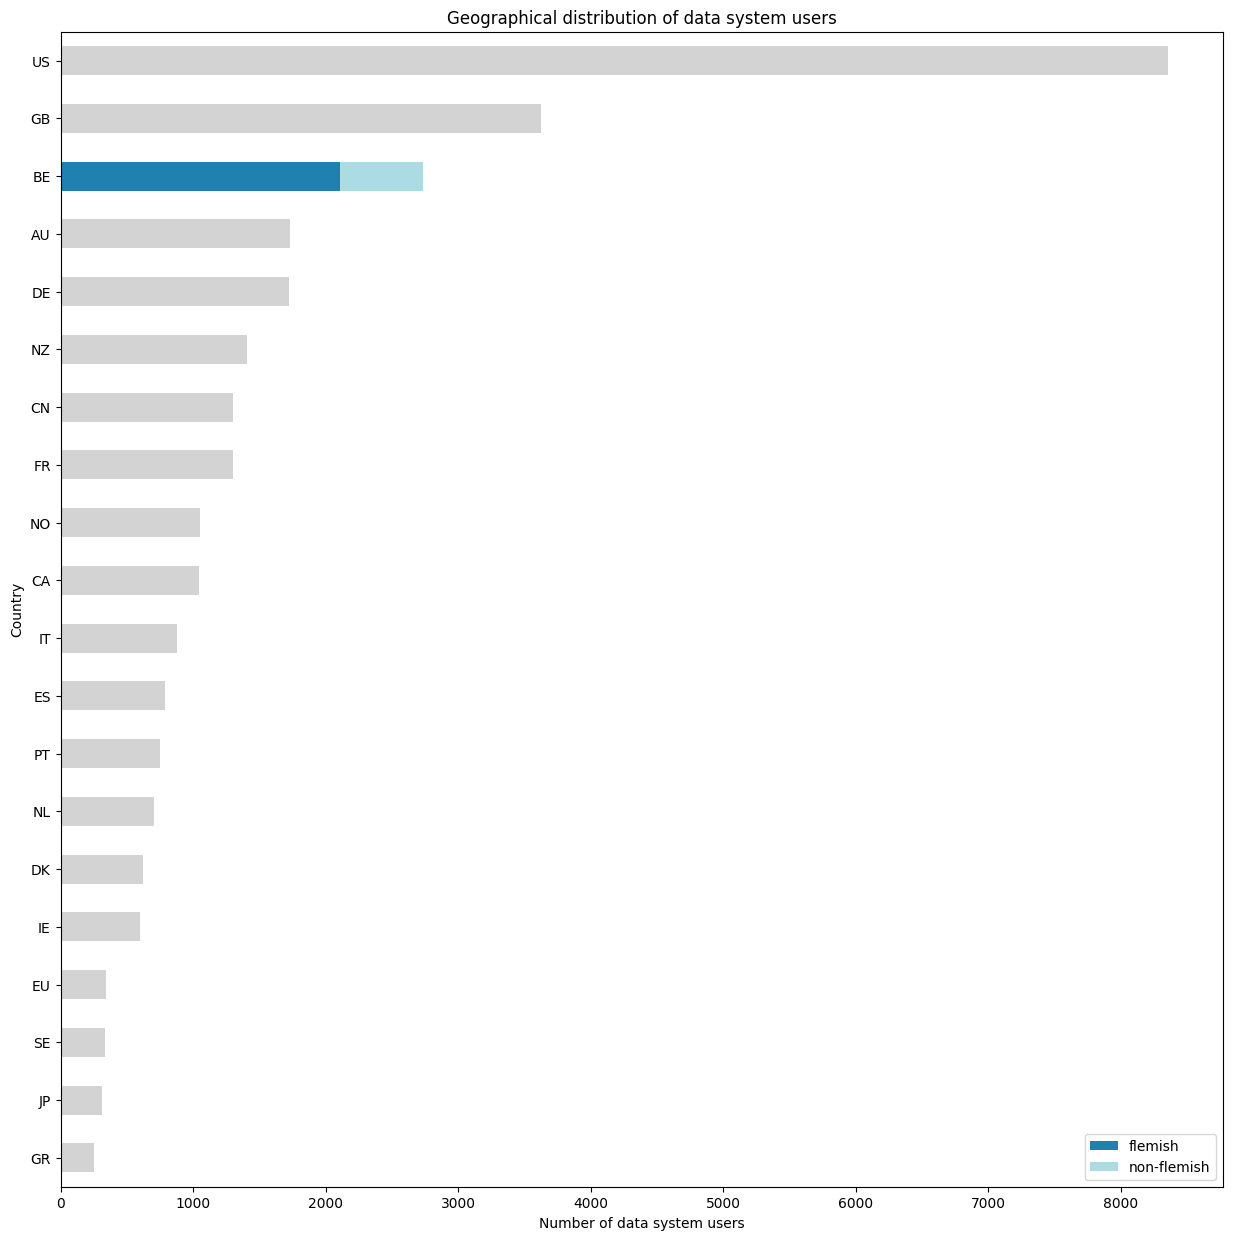

In [171]:
# Horizontal bar chart of number of data system users per country, with a distinction between flemish and non-flemish for Belgium affiliations
# for top 20 countries 
colors = ['#1e81b0', '#abdbe3', 'lightgrey']

count_info_top20.sort_values(by='datasyst_user',inplace=True)
barh_top20 = count_info_top20.plot(kind='barh', y=['flemish','non-flemish', 'other'], stacked=True, color=colors, figsize=(15, 15))

barh_top20.set_title('Geographical distribution of data system users')
barh_top20.set_xlabel('Number of data system users')
barh_top20.set_ylabel('Country')
barh_top20.legend(['flemish', 'non-flemish'], loc="lower right")
plt.show()

### Number of data system users per group and QH term

In [181]:
# table of unique datasystem users grouped per type of affiliation and quadruple helix group  
qh_group_info = datasys_users.groupby(['qh','group']).nunique()
qh_group_info.drop(('http://lifewatch.org/ns/Civil_society','http://lifewatch.org/ns/personal_interest'), inplace=True) #leaving out 'personal'
qh_group_info[['datasyst_user','affiliation_id']].rename(columns={'datasyst_user':'user count', 'affiliation_id':'affiliation count'})

user count  \
qh                                    group                                                          
http://lifewatch.org/ns/Civil_society http://lifewatch.org/ns/Creative_body                    198   
                                      http://lifewatch.org/ns/Educational_school                13   
                                      http://lifewatch.org/ns/NGO                               15   
                                      http://lifewatch.org/ns/Non-profit_organization         1202   
                                      http://lifewatch.org/ns/Other                             19   
http://lifewatch.org/ns/Industry      http://lifewatch.org/ns/Company                         2857   
                                      http://lifewatch.org/ns/Consultancy                     1159   
                                      http://lifewatch.org/ns/Research_institute                27   
http://lifewatch.org/ns/Policy        http://lifewatch.org/ns/Defence                          445   
                                      http://lifewatch.org/ns/EU_institution                   178   
                                      http://lifewatch.org/ns/Governmental_body               3370   
                                      http://lifewatch.org/ns/Intergovernmental_body           544   
                                      http://lifewatch.org/ns/Non-profit_organization           21   
                                      http://lifewatch.org/ns/Other_public_authorities         160   
                                      http://lifewatch.org/ns/Research_institute                 9   
                                      http://lifewatch.org/ns/UN_organization                   86   
http://lifewatch.org/ns/Science       http://lifewatch.org/ns/Company                           27   
                                      http://lifewatch.org/ns/Data_infrastructure              772   
                                      http://lifewatch.org/ns/Governmental_body                  9   
                                      http://lifewatch.org/ns/International_programme          305   
                                      http://lifewatch.org/ns/Museum                           534   
                                      http://lifewatch.org/ns/Research_institute              5947   
                                      http://lifewatch.org/ns/Research_network                   8   
                                      http://lifewatch.org/ns/Scientific_journal                 1   
                                      http://lifewatch.org/ns/University                     12556   

                                                                                        affiliation count  
qh                                    group                                                                
http://lifewatch.org/ns/Civil_society http://lifewatch.org/ns/Creative_body                             9  
                                      http://lifewatch.org/ns/Educational_school                        2  
                                      http://lifewatch.org/ns/NGO                                       4  
                                      http://lifewatch.org/ns/Non-profit_organization                  29  
                                      http://lifewatch.org/ns/Other                                    14  
http://lifewatch.org/ns/Industry      http://lifewatch.org/ns/Company                                 130  
                                      http://lifewatch.org/ns/Consultancy                              44  
                                      http://lifewatch.org/ns/Research_institute                        1  
http://lifewatch.org/ns/Policy        http://lifewatch.org/ns/Defence                                   2  
                                      http://lifewatch.org/ns/EU_institution                            5  
                                     